## Observations and Insights 

In [57]:
#1) Ramicane and Capomulin produced the best results in lowering total tumor volume. 
# 2) The average mouse weight has a strong correlation on their total tumor volume. 
# 3) The sex of the mice does not appear to have an impact on the effectivness of the drugs used. 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [5]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [6]:
df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')



In [7]:
df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
display(df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
df['Mouse ID'].nunique()

249

In [10]:
# Checking the number of mice.
df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data=df.loc[df["Mouse ID"]=="g989"]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean=clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_mice=clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance=clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_dev=clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem=clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_dict ={
    "Mean": mean,
    "Median": median_mice,
    "Variance": variance,
    "Standard Deviation": std_dev,
    "SEM":sem
}


In [53]:
drug_dict=pd.DataFrame(drug_dict)
drug_dict.head(10)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
clean_df.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

,Tumor Volume (mm3)
mean,50.449276
median,48.951421
var,79.291277
std,8.904565
sem,0.204933


## Bar and Pie Charts

Text(0, 0.5, 'Mice Tested')

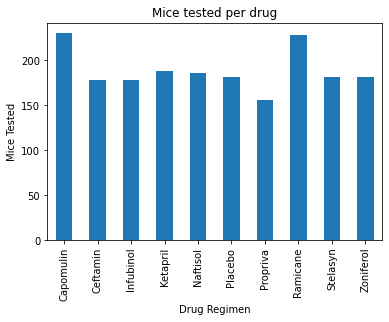

In [19]:
bar_plot= clean_df.groupby('Drug Regimen').count()["Mouse ID"]

mice_bar_plot=bar_plot.plot.bar(title="Mice tested per drug")

mice_bar_plot.set_xlabel('Drug Regimen')
mice_bar_plot.set_ylabel('Mice Tested')

In [20]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [21]:
Drug_Regimen= ["Ramicane", "Capomulin", "Infubinol", "Placebo", "Ceftamin", "Stelasyn", "Zoniferol", "Naftisol", "Ketapril", "Propriva"]
Timepoint= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]



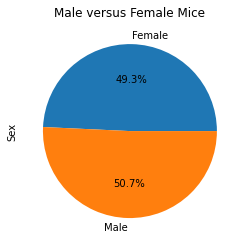

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pan
mouse_sex= clean_df.groupby("Sex").count()['Mouse ID']

plt.pie(mouse_sex, autopct="%1.1f%%", labels=mouse_sex.index);
plt.title("Male versus Female Mice")
plt.ylabel('Sex')
plt.show()

In [55]:
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_tumors=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
ramicane_tumors=clean_df.loc[clean_df["Drug Regimen"]=="Ramicane"]
infubinol_tumors=clean_df.loc[clean_df["Drug Regimen"]=="Infubinol"]
ceftamin_tumors=clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
capomax=capomulin_tumors.groupby('Mouse ID').max()['Timepoint']
capomax=pd.DataFrame(capomax)

rammax=ramicane_tumors.groupby('Mouse ID').max()['Timepoint']
rammax=pd.DataFrame(rammax)

infmax=infubinol_tumors.groupby('Mouse ID').max()['Timepoint']
infmax=pd.DataFrame(infmax)

cefmax=ceftamin_tumors.groupby('Mouse ID').max()['Timepoint']
cefmax=pd.DataFrame(cefmax)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomaxdf=pd.merge(capomax,clean_df, on=['Mouse ID','Timepoint'], how='left')
rammaxdf=pd.merge(rammax,clean_df, on=['Mouse ID','Timepoint'], how='left')
infmaxdf=pd.merge(infmax,clean_df, on=['Mouse ID', 'Timepoint'], how='left')
cefmaxdf=pd.merge(cefmax,clean_df, on=['Mouse ID', 'Timepoint'], how='left')



In [27]:
Merge=[capomaxdf,rammaxdf,infmaxdf,cefmaxdf]
maxtumor=pd.concat(Merge)
maxtumor.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [28]:
clean_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Line and Scatter Plots

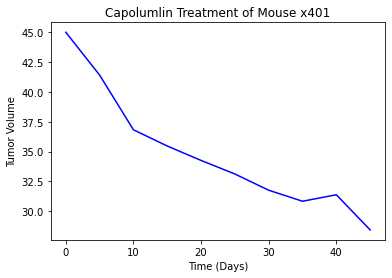

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin= clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")&(clean_df['Mouse ID']=="m601")]

x_axis= capomulin['Timepoint']
volume= capomulin['Tumor Volume (mm3)']

capomulin_line=plt.plot(x_axis, volume, color='blue')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume")
plt.title('Capolumlin Treatment of Mouse x401')

plt.show()

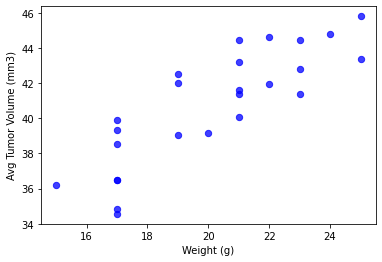

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterCap=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
scatter_avg=scatterCap.groupby(['Mouse ID']).mean()

x_axis=scatter_avg['Weight (g)']
avg_vol=scatter_avg['Tumor Volume (mm3)']

plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

plt.scatter(x_axis, avg_vol, facecolors="blue", s=40, alpha=0.75)


## Correlation and Regression

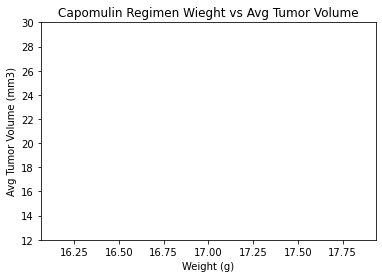

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_total= clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]

scatter_avg=capomulin.groupby(['Mouse ID']).mean()
scatter_avg

x_values=scatter_avg["Weight (g)"]
y_values=scatter_avg["Tumor Volume (mm3)"]


plt.scatter(x_values, y_values, facecolors="blue", s=40, alpha=0.75)

plt.ylim(30, 50)
plt.ylim(12,30)
plt.title("Capomulin Regimen Wieght vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()